In [28]:
import pandas as pd
import webcolors
import numpy as nump
import scipy as sci
import random
import matplotlib.pyplot as m
#from math import inf
m.style.use('ggplot')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Adriena Wong\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'sci']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
category = 'Science' #must be in ['Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids_and_Teens', 'News', 'Recreastion', 'Reference', 'Regional', 'Science', 'Shopping', 'Society', 'Sports']

df = pd.read_csv('ParsedWebsitesCleanSample.csv')
df = df.dropna().drop([df.columns[0], 'fonts', 'website', 'text'], axis = 1)
df = df[df['category'].str.contains(category)]
df['colors'] = df['colors'].replace({' ': ', '}, regex=True)
df['colors'] = df['colors'].str.split(',').str[0]
df['colors'] = df['colors'].replace({'[^0-9a-zA-Z#]': ''}, regex=True)
df['rgb_colors'] = df['colors'].apply(webcolors.hex_to_rgb)
df

,category,colors,rgb_colors
1,/Science/Instruments_and_Supplies/Laboratory_C...,#f2f2f2,"(242, 242, 242)"
3,/Science/Earth_Sciences/Geomatics,#f5f5f5,"(245, 245, 245)"
4,/Science/Environment/Biodiversity,#3b312f,"(59, 49, 47)"
5,/Science/Astronomy/Extrasolar_Planets,#000000,"(0, 0, 0)"
7,/Science/Environment/Organizations,#f5f5f5,"(245, 245, 245)"
...,...,...,...
3527,/Science/Technology/Transportation,#ef9f49,"(239, 159, 73)"
3529,/Science/Technology/Safety_Engineering,#5da423,"(93, 164, 35)"
3532,/Science/Environment/Organizations,#004054,"(0, 64, 84)"
3533,/Science/Biology/Methods_and_Techniques,#818a91,"(129, 138, 145)"


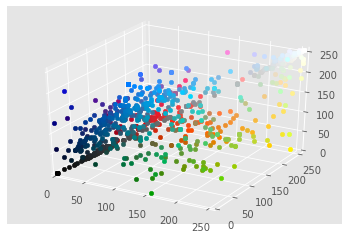

In [64]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlim(0, 255)
ax1.set_ylim(0, 255)
ax1.set_zlim(0, 255)

for i in range(0,len(df)):
    rgb_tuple = tuple(np.array(df.iloc[i]['rgb_colors']))
    hex_value = df.iloc[i]['colors']
    ax1.scatter(rgb_tuple[0], rgb_tuple[1], rgb_tuple[2], c=hex_value, marker='o')

    #Test